## SVM-Regression

In [62]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [63]:
rand = np.random.RandomState(1)
X = np.sort(5 * rand.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add noise to targets
y[::5] += 3 * (0.5 - rand.rand(8))

In [64]:
def plotRegression(svrs, kernel_label):
    lw = 2
    model_color = ["m", "c", "g"]
    svrs = [svr_rbf, svr_lin, svr_poly]
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
    for ix, svr in enumerate(svrs):
        axes[ix].plot(
            X,
            svr.fit(X, y).predict(X),
            color=model_color[ix],
            lw=lw,
            label="{} model".format(kernel_label[ix]),
        )
        axes[ix].plot(
            X,
            svr.fit(X, y).predict(X)+svr.epsilon,
            color="lightcoral",
            ls="--",
            lw=lw,
            label="epsilon (+)".format(kernel_label[ix]),
        )
        axes[ix].plot(
            X,
            svr.fit(X, y).predict(X)-svr.epsilon,
            color="lightcoral",
            ls="--",
            lw=lw,
            label="epsilon (-)".format(kernel_label[ix]),
        )
        axes[ix].scatter(
            X[svr.support_],
            y[svr.support_],
            facecolor="none",
            edgecolor=model_color[ix],
            s=50,
            label="support vectors".format(kernel_label[ix]),
        )
        axes[ix].scatter(
            X[np.setdiff1d(np.arange(len(X)), svr.support_)],
            y[np.setdiff1d(np.arange(len(X)), svr.support_)],
            facecolor="none",
            edgecolor="k",
            s=50,
            label="other training data",
        )
        axes[ix].legend(
            loc="upper center",
            bbox_to_anchor=(0.5, 1.1),
            ncol=1,
            fancybox=True,
            shadow=True,
        )

    fig.text(0.5, 0.04, "data", ha="center", va="center")
    fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
    fig.suptitle("Support Vector Regression", fontsize=14)
    plt.show()

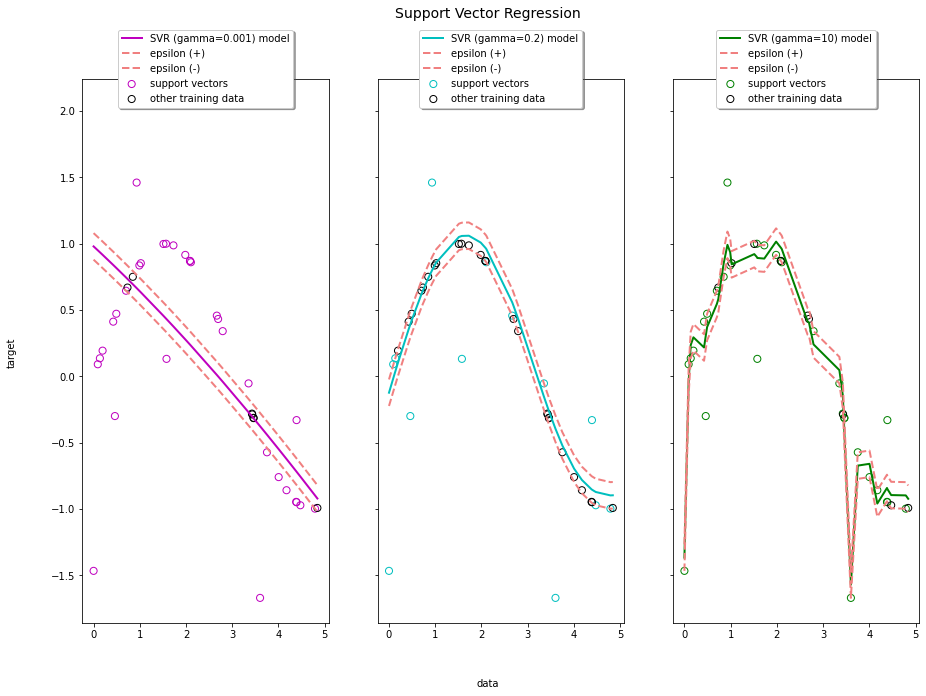

In [65]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.001, epsilon=0.1)
svr_lin = SVR(kernel="rbf", C=100, gamma=0.2, epsilon=0.1)
svr_poly = SVR(kernel="rbf", C=100, gamma=10, epsilon=0.1)

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["SVR (gamma=0.001)", "SVR (gamma=0.2)", "SVR (gamma=10)"]
plotRegression(svrs, kernel_label)

### Parameter Gamma/Sigma
Der Parameter Gamma beschreibt im RBF-Kerbel die Inverse der Standardabweichung. Somit ist Gamma umgekehrt proprortional zu Sigma (Gamma~1/Sigma). Gamma beschriebt den "Radius" des Einflusses eines Datenpunktes. Je größer Gamma desto weiter reicht der Einfluss des Punktes.

Wenn Gamma zu groß (Sigma zu klein) ist (Plot 3) führt das zu Overfitting, da der Einfluss der einzelnen Punkte zu groß ist. Ist Gamma zu klein (Sigma zu groß) (Plot 1) gelingt es nicht die "Form" der Funktion abzubilden.

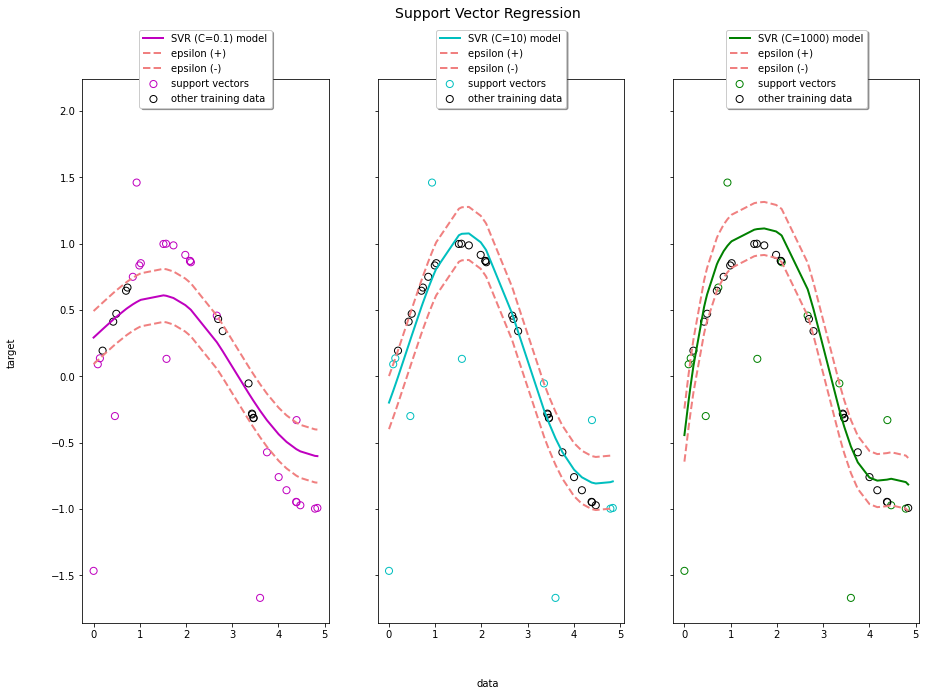

In [66]:
svr_rbf = SVR(kernel="rbf", C=0.1, gamma=0.2, epsilon=0.2)
svr_lin = SVR(kernel="rbf", C=10, gamma=0.2, epsilon=0.2)
svr_poly = SVR(kernel="rbf", C=1000, gamma=0.2, epsilon=0.2)

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["SVR (C=0.1)", "SVR (C=10)", "SVR (C=1000)"]
plotRegression(svrs, kernel_label)

### Parameter C
Der Parameter C besschreibt die Gewichtung der Trainingsdaten. Für größere Werte von C wird eine kleiner Abweichung akueptiert, wenn die Regressionsfunktion näher an den Daten ist. Ein niedrigeres C führt hingegen zu einer größeren akzeptierten Abweichung was zu einer einfacheren Regressionsfunktion führt.

In den Plots ist zu erkennen, dass je kleiner C ist, desto weniger Einfluss haben die Traingsdaten auf die Regressionsfunktion. Je größer C desto mehr wird die Regressionsfunktion durch Ausreißer beeinfluss (bei Plot 3 am Ende gut zu erkennen). 

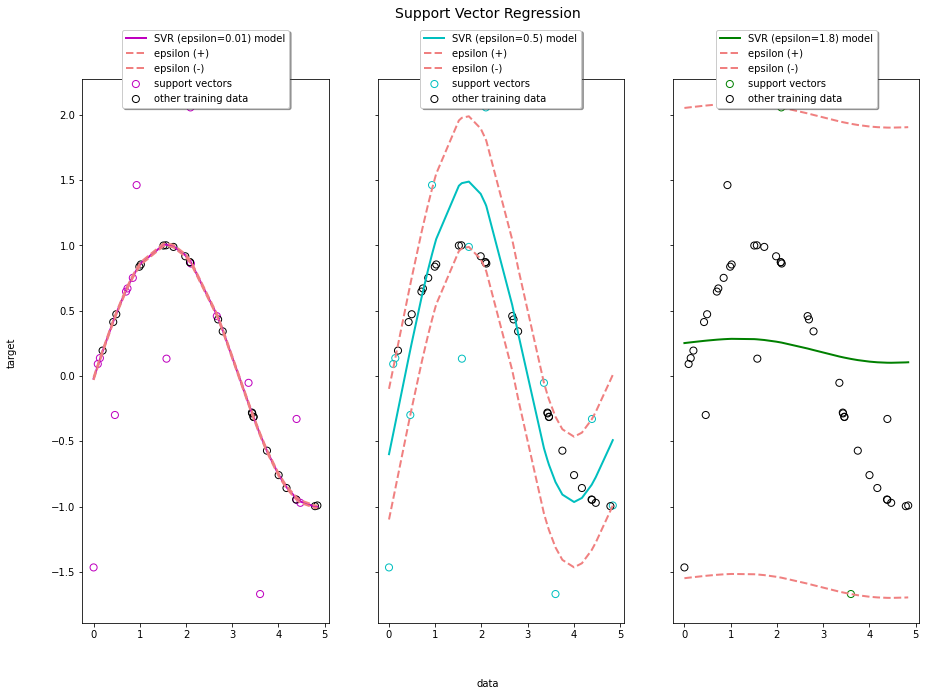

In [70]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.2, epsilon=0.01)
svr_lin = SVR(kernel="rbf", C=100, gamma=0.2, epsilon=0.5)
svr_poly = SVR(kernel="rbf", C=100, gamma=0.2, epsilon=1.8)

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["SVR (epsilon=0.01)", "SVR (epsilon=0.5)", "SVR (epsilon=1.8)"]
plotRegression(svrs, kernel_label)

### Parameter Epsilon
Der Parameter epsilon beschreibt das Unempfindlichkeitsband bei nichtlinearer Regressionfunktion. Innerhalb dieses "Schlauchs" werden die Daten nicht zu Funktionsbestimmung berücksichtigt. Die Punkte außerhalb oder am Rand des "Schlauchs" sind Support-Vektoren. Dadurch word die Anzahl der Support-Vektoren und damit auch die komplexität der Funktion beeinflusst. 

In den Plots sieht man das Unempfindlichkeitsband als gestirchelte Linie eingezeichnet. Des weiteren sind die Support-Vektoren farbig und die restlichen Daten schwarz markiert. Es ist deutlich zu erkennen, dass bei zu großem epsilon (Plot 3) zu wenig Daten berücksichtigt werden (nur 2 Support-Vektoren). Dadurch wird die Funktion sehr flach und weicht deutlich von der Sinus-Funktion ab. Bei kleinem espilon schmiegt sich die Funktion besser an die Sinus-Funktion an. Dadurch wird allerdings auch die komplexität der Funktion erhöht.

Generell kann man sagen, dass wenn man eine gute Regressionsfunktion gefunden hat versuchen kann durch erhöhen von epsilon die Anzahl der Supporvektoren (und damit die Komplexität) zu veringern.